潜在クラスポアソンモデル？  
https://www.asakura.co.jp/detail.php?book_code=12853
の6章

In [1]:
import os

import arviz as az
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import pytensor.tensor as pt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

os.chdir('/content/drive/MyDrive/dataset/marketing_statistics-model/')

In [2]:
df = pd.read_csv('sec6_mixture.csv')
df.head()

,pid,A,B,C,D,E,F,G,H,I,...,Ie,Aa,Ba,Ca,Da,Ea,Fa,Ga,Ha,Ia
0,100011,0,0,2,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
1,100075,0,0,2,0,0,0,0,0,0,...,0,0,0,2,0,0,1,0,0,0
2,100149,0,0,3,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
3,100301,0,1,2,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,100303,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [3]:
print(df.shape)

(310, 38)


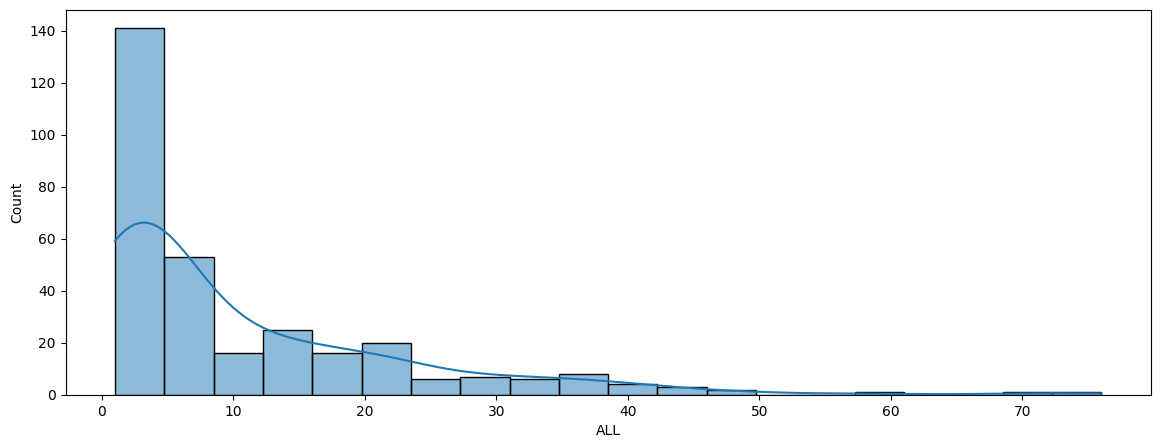

In [4]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.histplot(df['ALL'], kde=True)
plt.show()

In [5]:
cols = ['Bp', 'Cp', 'Dp', 'Ep', 'Fp', 'Gp', 'Hp', 'Ip']
X = df[cols]
#Y = df['ALL'] / df['ALL'].max()
Y = df['ALL']
N = df.shape[0]
col_num = len(cols)
n_components = 4

In [6]:
model = pm.Model()

with model:
    X_data = pm.Data('X_data', X, mutable=True)
    Y_data = pm.Data("Y_data", Y, mutable=True)

    # 各カテゴリの割り当て確率
    w = pm.Dirichlet('w', a=np.ones(n_components))
    beta = pm.Normal('beta', mu=0.0, sigma=10.0, shape=(n_components, col_num))
    b = pm.Normal('b', mu=0.0, sigma=10.0, shape=n_components)

    lamb = pm.Deterministic('lamb',
                            pm.math.exp(
                                pt.dot(X_data, beta.T)+b, # (N, n_components) = (N, col_num) @ (col_num, n_components)
                                )
                            )
    # pm.Distributionクラスのインスタンスを返す
    components = pm.Poisson.dist(mu=lamb)
    y_obs = pm.Mixture('y_obs', w=w, comp_dists=components, observed=Y_data)

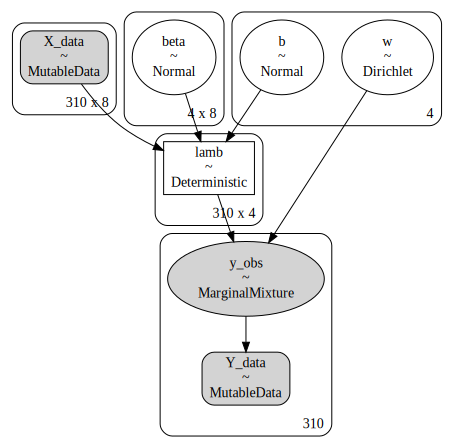

In [7]:
g = pm.model_to_graphviz(model)
display(g)

In [8]:
with model:
    idata = pm.sample(chains=1, target_accept=0.95, random_seed=42)

/usr/local/lib/python3.10/dist-packages/arviz/plots/traceplot.py:222: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (32), generating only 20 plots
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


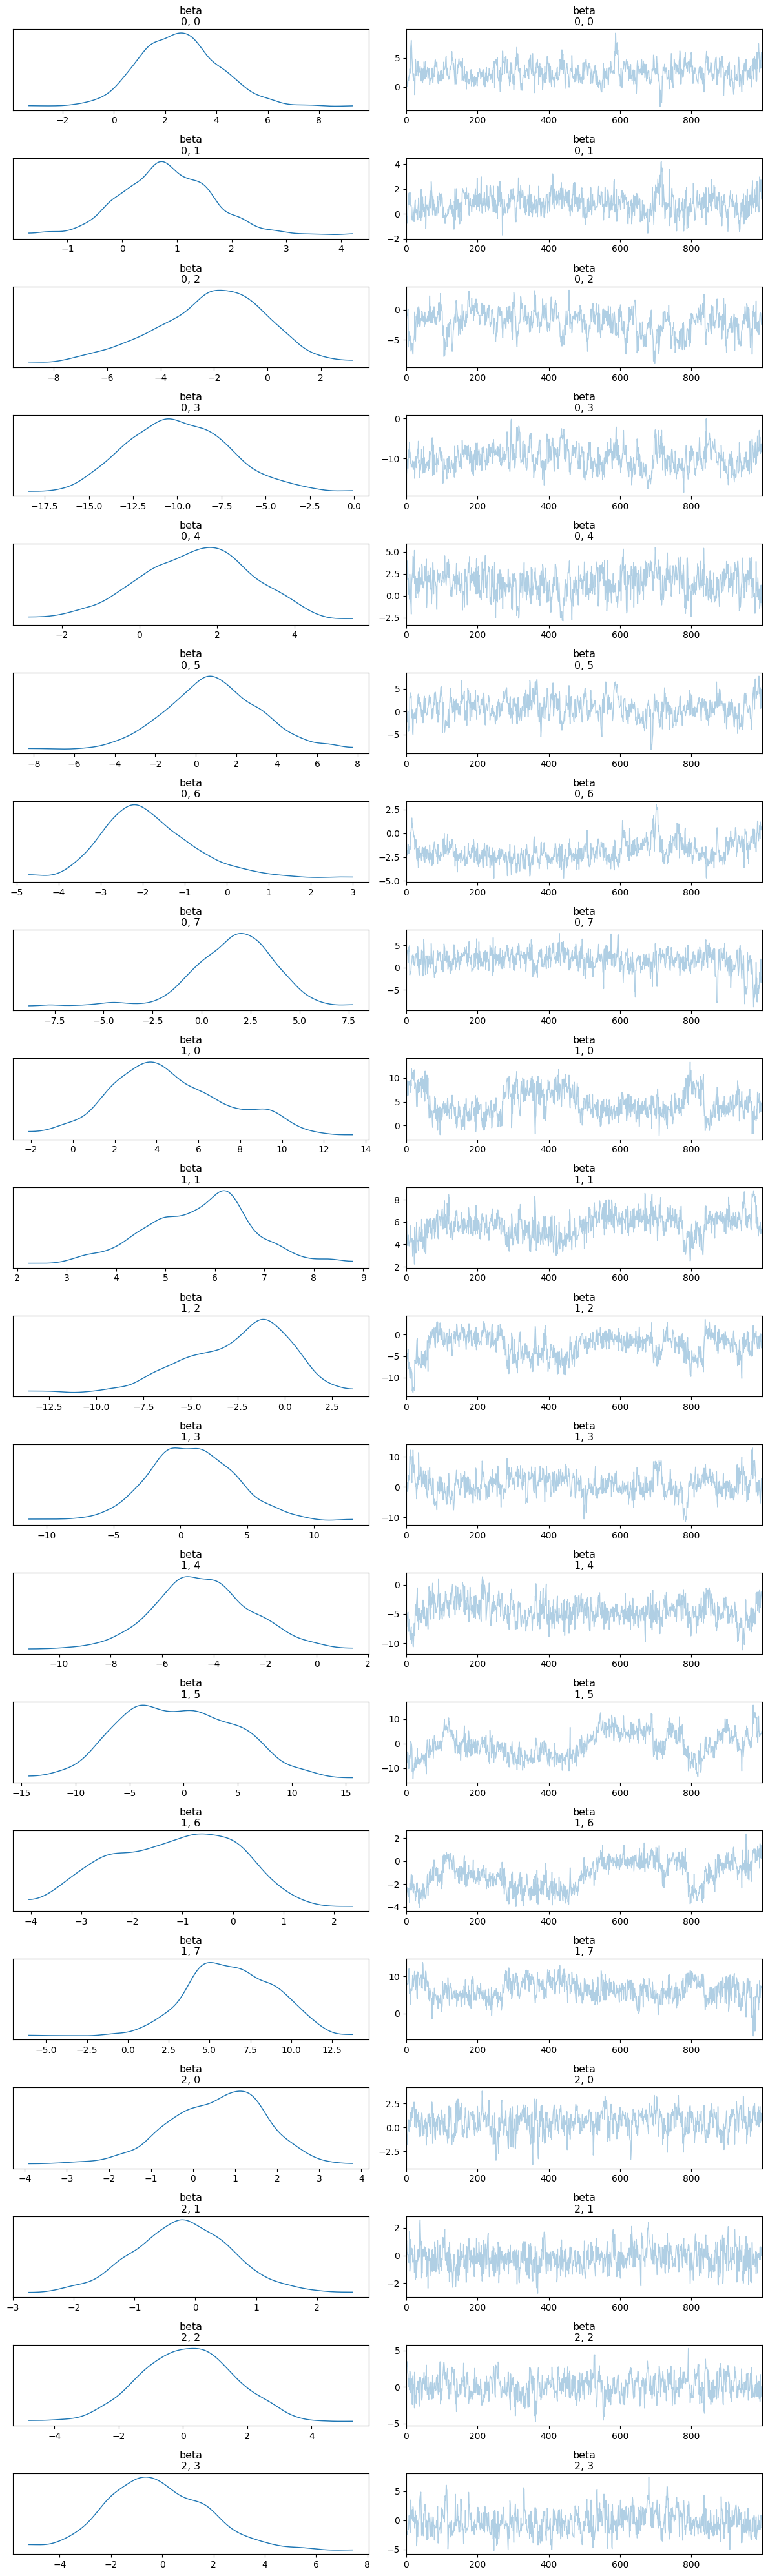

In [9]:
az.plot_trace(idata, var_names=['beta'], compact=False)
plt.tight_layout();

In [10]:
summary = az.summary(idata, var_names='beta')
display(summary)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"beta[0, 0]",2.560,1.580,-0.342,5.518,0.113,0.080,200.0,263.0,NaN
"beta[0, 1]",0.812,0.835,-0.755,2.329,0.078,0.056,113.0,282.0,NaN
"beta[0, 2]",-2.104,2.059,-6.189,1.529,0.351,0.251,39.0,264.0,NaN
"beta[0, 3]",-9.895,2.873,-15.247,-4.740,0.337,0.246,71.0,195.0,NaN
"beta[0, 4]",1.449,1.467,-1.440,4.002,0.110,0.078,173.0,269.0,NaN
"beta[0, 5]",0.843,2.341,-3.381,5.398,0.199,0.141,141.0,189.0,NaN
"beta[0, 6]",-1.847,1.125,-3.771,0.319,0.424,0.313,7.0,111.0,NaN
"beta[0, 7]",1.552,2.297,-2.256,5.899,0.533,0.383,22.0,17.0,NaN
"beta[1, 0]",4.656,2.767,-0.276,9.818,0.609,0.475,25.0,119.0,NaN
"beta[1, 1]",5.701,1.076,3.409,7.497,0.461,0.351,5.0,181.0,NaN


In [13]:
from scipy import stats

X_data = X.to_numpy()
y_data = Y.to_numpy()
alpha = np.median(idata['posterior']['w'].to_numpy().squeeze(0), axis=0) # (4, )
beta = np.median(idata['posterior']['beta'].to_numpy().squeeze(0), axis=0) # (4, 8)
b = np.median(idata['posterior']['b'].to_numpy().squeeze(0), axis=0) # (4, )

mu_hat = beta @ X_data.T
for i in range(mu_hat.shape[0]):
    for j in range(mu_hat.shape[1]):
        mu_hat[i][j] = mu_hat[i][j] + b[i]
mu_hat = np.exp(mu_hat)

likelihood = stats.poisson.logpmf(y_data, mu_hat)

f = np.zeros((4, X_data.shape[0])) # (4, N)
for i in range(f.shape[0]):
    for j in range(f.shape[1]):
        f[i][j] = likelihood[i][j] * alpha[i]
result = np.argmax(f, axis=0)
print(result)

[2 2 3 2 2 2 1 3 2 3 2 2 3 3 2 3 3 3 3 3 2 3 3 2 2 2 2 3 3 1 2 3 2 3 3 2 3
 3 3 3 3 2 3 3 0 3 3 2 3 3 3 3 3 2 3 3 3 3 3 2 0 2 0 2 1 2 2 2 2 1 0 2 2 0
 2 0 2 0 1 0 2 2 0 2 2 2 2 2 1 2 2 2 2 1 0 3 2 0 1 1 0 2 1 0 0 2 1 2 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 3 2 1 1 1 2 1 1 2 1 3 2 1 3 3 3 1
 0 0 2 1 0 1 0 2 2 1 2 3 1 2 2 0 2 0 0 2 2 3 1 0 2 2 2 2 2 0 1 2 2 2 0 1 3
 1 1 1 1 1 2 0 2 1 2 1 2 0 0 1 0 0 1 3 0 1 2 2 1 0 2 1 2 0 0 2 0 0 2 2 2 2
 0 0 2 0 2 3 2 0 0 2 2 2 1 2 1 2 1 3 0 3 0 0 2 1 1 1 2 1 1 0 1 1 0 1 0 1 3
 1 1 2 2 1 1 1 0 2 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 3 3 1 0 2 0 2 1 3
 1 2 0 0 0 1 1 0 0 0 0 0 1 2]


In [17]:
from scipy import stats

X_data = X.to_numpy()
y_data = Y.to_numpy()
alpha = np.median(idata['posterior']['w'].to_numpy().squeeze(0), axis=0) # (4, )
beta = np.median(idata['posterior']['beta'].to_numpy().squeeze(0), axis=0) # (4, 8)
b = np.median(idata['posterior']['b'].to_numpy().squeeze(0), axis=0) # (4, )

# # 各サンプルの中央値をポアソン分布のλの推定値的に扱う
mu_hat = np.exp(beta @ X_data.T + b[:, np.newaxis]) # (4, N) = (4, 8) @ (8, N)
likelihood = stats.poisson.logpmf(y_data, mu_hat)
f = (likelihood * alpha[:, np.newaxis])
result = np.argmax(f, axis=0)
result

array([2, 2, 3, 2, 2, 2, 1, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3,
       3, 2, 2, 2, 2, 3, 3, 1, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       0, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 0, 2, 0, 2, 1, 2,
       2, 2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 2, 1, 0, 3, 2, 0, 1, 1, 0, 2, 1, 0, 0, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 1, 0, 0, 2, 1, 0, 1,
       0, 2, 2, 1, 2, 3, 1, 2, 2, 0, 2, 0, 0, 2, 2, 3, 1, 0, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 0, 1, 3, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 1, 2, 0,
       0, 1, 0, 0, 1, 3, 0, 1, 2, 2, 1, 0, 2, 1, 2, 0, 0, 2, 0, 0, 2, 2,
       2, 2, 0, 0, 2, 0, 2, 3, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 3, 0, 3,
       0, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 3, 1, 1, 2, 2, 1,
       1, 1, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 3, 3, 1, 0, 2, 0, 2, 1, 3, 1, 2, 0, 0, 0,

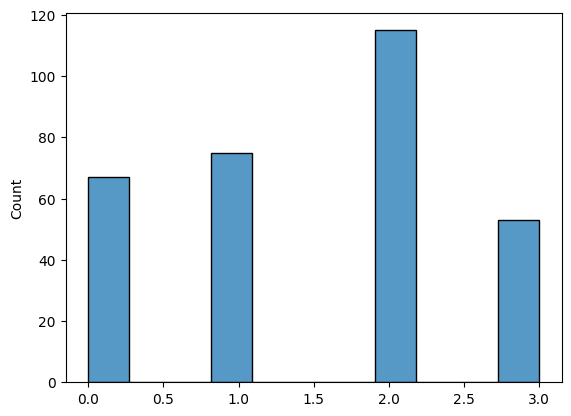

In [18]:
fig, ax = plt.subplots()
sns.histplot(result)
plt.show()